#### Part 1: Deep Learning-Based Recommendation

##### Reference Paper: https://arxiv.org/pdf/1606.07792

##### Downloaded the datasets from https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset (anime-dataset-2023.csv, users-details-2023.csv, users-score- 2023.csv)

Loading the dataset

In [2]:
!pip install pandas
!pip install numpy
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 50.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.7/163.7 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 57.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.0/322.0 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 50.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 18.1 MB/s eta 0:00:00


In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

Loading the anime dataset 

In [4]:
a_df  = pd.read_csv('anime-dataset-2023.csv')

Loaded the anime dataset and displaying top 10 rows and bottom 10 rows of this dataset

In [5]:
a_df.head(10)

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...
5,15,Eyeshield 21,UNKNOWN,アイシールド21,7.92,Sports,"Shy, reserved, and small-statured, Deimon High...",TV,145.0,"Apr 6, 2005 to Mar 19, 2008",...,Gallop,Manga,23 min per ep,PG-13 - Teens 13 or older,688.0,1252,1997,86524.0,177688,https://cdn.myanimelist.net/images/anime/1079/...
6,16,Hachimitsu to Clover,Honey and Clover,ハチミツとクローバー,8.0,"Comedy, Drama, Romance","Yuuta Takemoto, a sophomore at an arts college...",TV,24.0,"Apr 15, 2005 to Sep 27, 2005",...,J.C.Staff,Manga,23 min per ep,PG-13 - Teens 13 or older,589.0,862,4136,81747.0,260166,https://cdn.myanimelist.net/images/anime/1301/...
7,17,Hungry Heart: Wild Striker,UNKNOWN,ハングリーハート Wild Striker,7.55,"Comedy, Slice of Life, Sports",As the younger brother of Japanese soccer star...,TV,52.0,"Sep 11, 2002 to Sep 10, 2003",...,Nippon Animation,Manga,23 min per ep,PG-13 - Teens 13 or older,1551.0,4212,237,12960.0,24172,https://cdn.myanimelist.net/images/anime/12/49...
8,18,Initial D Fourth Stage,UNKNOWN,頭文字〈イニシャル〉D FOURTH STAGE,8.16,"Action, Drama",Takumi Fujiwara finally joins Ryousuke and Kei...,TV,24.0,"Apr 17, 2004 to Feb 18, 2006",...,A.C.G.T.,Manga,27 min per ep,PG-13 - Teens 13 or older,393.0,1273,1237,97878.0,173710,https://cdn.myanimelist.net/images/anime/9/105...
9,19,Monster,Monster,モンスター,8.87,"Drama, Mystery, Suspense","Dr. Kenzou Tenma, an elite neurosurgeon recent...",TV,74.0,"Apr 7, 2004 to Sep 28, 2005",...,Madhouse,Manga,24 min per ep,R+ - Mild Nudity,26.0,142,47235,368569.0,1013100,https://cdn.myanimelist.net/images/anime/10/18...


In [6]:
a_df.tail(10)

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
24895,55726,"Die, Please!",UNKNOWN,부탁이니 죽어주라,UNKNOWN,"Fantasy, Romance",I just want to tell him how I feel!\nMina has ...,ONA,UNKNOWN,"May 31, 2023 to ?",...,UNKNOWN,Web manga,5 min,G - All Ages,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1621/...
24896,55727,Miru,UNKNOWN,未ル,UNKNOWN,Action,No description available for this anime.,UNKNOWN,UNKNOWN,2024 to ?,...,UNKNOWN,Original,Unknown,UNKNOWN,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1135/...
24897,55728,Wo Mengjian ni Mengjian wo,A Dream Where You Dreamt of Me,我夢見你夢見我,UNKNOWN,Drama,Music video for the song Wo Mengjian ni Mengji...,Music,1.0,"Jun 22, 2017",...,UNKNOWN,Original,4 min,G - All Ages,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1171/...
24898,55729,Thailand,UNKNOWN,Thailand,UNKNOWN,Avant Garde,Music video for the song Thailand by Oh Shu.,Music,1.0,"Jul 3, 2014",...,UNKNOWN,Original,4 min,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1887/...
24899,55730,Energy,UNKNOWN,Energy,UNKNOWN,Avant Garde,Music video for the song Energy by SLEEQ (Kim ...,Music,1.0,"Feb 11, 2015",...,UNKNOWN,Original,4 min,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1817/...
24900,55731,Wu Nao Monu,UNKNOWN,无脑魔女,UNKNOWN,"Comedy, Fantasy, Slice of Life",No description available for this anime.,ONA,15.0,"Jul 4, 2023 to ?",...,UNKNOWN,Web manga,Unknown,PG-13 - Teens 13 or older,UNKNOWN,24723,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1386/...
24901,55732,Bu Xing Si: Yuan Qi,Blader Soul,捕星司·源起,UNKNOWN,"Action, Adventure, Fantasy",No description available for this anime.,ONA,18.0,"Jul 27, 2023 to ?",...,UNKNOWN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1383/...
24902,55733,Di Yi Xulie,The First Order,第一序列,UNKNOWN,"Action, Adventure, Fantasy, Sci-Fi",No description available for this anime.,ONA,16.0,"Jul 19, 2023 to ?",...,UNKNOWN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1130/...
24903,55734,Bokura no Saishuu Sensou,UNKNOWN,僕らの最終戦争,UNKNOWN,UNKNOWN,A music video for the song Bokura no Saishuu S...,Music,1.0,"Apr 23, 2022",...,UNKNOWN,Original,3 min,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1931/...
24904,55735,Shijuuku Nichi,UNKNOWN,四十九日,UNKNOWN,UNKNOWN,A music video for the song Shijuuku Nichi by S...,Music,1.0,"Sep 5, 2022",...,UNKNOWN,Original,3 min,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1902/...


In [7]:
a_df.shape

(24905, 24)

The dataset consists of 24905 rows and 24 columns.

In [9]:
ud_df = pd.read_csv('users-details-2023.csv')

Loaded the users details dataset and displaying top 10 rows and bottom 10 rows of this dataset

In [10]:
ud_df.head(10)

,Mal ID,Username,Gender,Birthday,Location,Joined,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched
0,1,Xinil,Male,1985-03-04T00:00:00+00:00,California,2004-11-05T00:00:00+00:00,142.3,7.37,1.0,233.0,8.0,93.0,64.0,399.0,60.0,8458.0
1,3,Aokaado,Male,NaN,"Oslo, Norway",2004-11-11T00:00:00+00:00,68.6,7.34,23.0,137.0,99.0,44.0,40.0,343.0,15.0,4072.0
2,4,Crystal,Female,NaN,"Melbourne, Australia",2004-11-13T00:00:00+00:00,212.8,6.68,16.0,636.0,303.0,0.0,45.0,1000.0,10.0,12781.0
3,9,Arcane,NaN,NaN,NaN,2004-12-05T00:00:00+00:00,30.0,7.71,5.0,54.0,4.0,3.0,0.0,66.0,0.0,1817.0
4,18,Mad,NaN,NaN,NaN,2005-01-03T00:00:00+00:00,52.0,6.27,1.0,114.0,10.0,5.0,23.0,153.0,42.0,3038.0
5,20,vondur,Male,1988-01-25T00:00:00+00:00,"Bergen, Norway",2005-01-05T00:00:00+00:00,73.1,8.06,11.0,94.0,11.0,2.0,20.0,138.0,7.0,4374.0
6,23,Amuro,NaN,1988-02-22T00:00:00+00:00,Canada,2005-01-23T00:00:00+00:00,142.5,7.41,20.0,298.0,5.0,19.0,50.0,392.0,0.0,8565.0
7,36,Baman,Male,NaN,Land of Rain and Fjords,2005-02-05T00:00:00+00:00,272.1,5.90,27.0,1144.0,11.0,55.0,338.0,1575.0,36.0,16309.0
8,44,beddan,Male,NaN,NaN,2005-02-21T00:00:00+00:00,18.6,7.60,0.0,37.0,0.0,0.0,0.0,37.0,0.0,1083.0
9,47,kei-clone,Male,NaN,31f288172a11dea9f2781a6d87e0a200,2005-03-09T00:00:00+00:00,34.5,6.84,15.0,104.0,22.0,3.0,19.0,163.0,1.0,2054.0


In [11]:
ud_df.tail(10)

,Mal ID,Username,Gender,Birthday,Location,Joined,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched
731280,1291057,imjustjk,Male,1997-12-24T00:00:00+00:00,"Newport Coast, California",2012-05-06T00:00:00+00:00,101.9,7.00,3.0,181.0,5.0,19.0,34.0,242.0,19.0,7015.0
731281,1291063,Leastu,NaN,NaN,NaN,2012-05-06T00:00:00+00:00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
731282,1291065,stasia-writer,NaN,NaN,NaN,2012-05-06T00:00:00+00:00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
731283,1291071,Fiswoul,NaN,NaN,NaN,2012-05-06T00:00:00+00:00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
731284,1291079,Dybido,Male,NaN,NaN,2012-05-06T00:00:00+00:00,41.0,8.48,2.0,88.0,7.0,5.0,33.0,135.0,0.0,3317.0
731285,1291083,Dolopa,NaN,NaN,NaN,2012-05-06T00:00:00+00:00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
731286,1291085,alenrobnik,NaN,NaN,NaN,2012-05-06T00:00:00+00:00,21.4,8.22,16.0,58.0,9.0,1.0,42.0,126.0,0.0,1239.0
731287,1291087,Oblongata,NaN,1993-01-30T00:00:00+00:00,NaN,2012-05-06T00:00:00+00:00,51.3,7.53,38.0,175.0,0.0,9.0,211.0,433.0,2.0,3010.0
731288,1291091,Etnota,NaN,NaN,NaN,2012-05-06T00:00:00+00:00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
731289,1291097,JuunanaSai,Female,NaN,NaN,2012-05-06T00:00:00+00:00,3.7,9.67,1.0,11.0,0.0,0.0,2.0,14.0,0.0,222.0


In [12]:
ud_df.shape

(731290, 16)

This user details consists of 731290 rows and 16 columns.

In [14]:
us_df = pd.read_csv('users-score-2023.csv')

Loaded the user scores dataset and displaying top 10 rows and bottom 10 rows of this dataset

In [15]:
us_df.head(10)

,user_id,Username,anime_id,Anime Title,rating
0,1,Xinil,21,One Piece,9
1,1,Xinil,48,.hack//Sign,7
2,1,Xinil,320,A Kite,5
3,1,Xinil,49,Aa! Megami-sama!,8
4,1,Xinil,304,Aa! Megami-sama! Movie,8
5,1,Xinil,306,Abenobashi Mahou☆Shoutengai,8
6,1,Xinil,53,Ai Yori Aoshi,7
7,1,Xinil,47,Akira,5
8,1,Xinil,591,Amaenaide yo!!,6
9,1,Xinil,54,Appleseed (Movie),7


In [16]:
us_df.tail(10)

,user_id,Username,anime_id,Anime Title,rating
24325181,1291087,Oblongata,10495,Yuru Yuri,7
24325182,1291087,Oblongata,12403,Yuru Yuri♪♪,8
24325183,1291087,Oblongata,10578,C³,6
24325184,1291087,Oblongata,12549,"Dakara Boku wa, H ga Dekinai.",4
24325185,1291087,Oblongata,13367,"Kono Naka ni Hitori, Imouto ga Iru!",5
24325186,1291087,Oblongata,10611,R-15,3
24325187,1291087,Oblongata,174,Tenjou Tenge,6
24325188,1291097,JuunanaSai,1535,Death Note,9
24325189,1291097,JuunanaSai,226,Elfen Lied,10
24325190,1291097,JuunanaSai,8425,Gosick,10


In [17]:
us_df.shape

(24325191, 5)

This user scores dataset consists of 24325191 rows and 5 columns.

In [18]:
us_df.columns

Index(['user_id', 'Username', 'anime_id', 'Anime Title', 'rating'], dtype='object')

In [19]:
us_df.columns

Index(['user_id', 'Username', 'anime_id', 'Anime Title', 'rating'], dtype='object')

In [20]:
a_df.columns

Index(['anime_id', 'Name', 'English name', 'Other name', 'Score', 'Genres',
       'Synopsis', 'Type', 'Episodes', 'Aired', 'Premiered', 'Status',
       'Producers', 'Licensors', 'Studios', 'Source', 'Duration', 'Rating',
       'Rank', 'Popularity', 'Favorites', 'Scored By', 'Members', 'Image URL'],
      dtype='object')

In [21]:
merged_df = pd.merge(a_df, us_df, on='anime_id')

In [22]:
merged_df_original = merged_df
merged_df.columns

Index(['anime_id', 'Name', 'English name', 'Other name', 'Score', 'Genres',
       'Synopsis', 'Type', 'Episodes', 'Aired', 'Premiered', 'Status',
       'Producers', 'Licensors', 'Studios', 'Source', 'Duration', 'Rating',
       'Rank', 'Popularity', 'Favorites', 'Scored By', 'Members', 'Image URL',
       'user_id', 'Username', 'Anime Title', 'rating'],
      dtype='object')

Merged the anime_df and user_scores_df on the basis of anime_id into single data frame called final_df. Now merging final_df and user_details_df on the basis of username.

In [23]:
merged_df = pd.merge(merged_df, ud_df, on='Username')

Merged all the 3 datasets and named the final dataframe as final_df.

In [24]:
merged_df.head()

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,142.3,7.37,1.0,233.0,8.0,93.0,64.0,399.0,60.0,8458.0
1,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,212.8,6.68,16.0,636.0,303.0,0.0,45.0,1000.0,10.0,12781.0
2,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,73.1,8.06,11.0,94.0,11.0,2.0,20.0,138.0,7.0,4374.0
3,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,142.5,7.41,20.0,298.0,5.0,19.0,50.0,392.0,0.0,8565.0
4,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,34.5,6.84,15.0,104.0,22.0,3.0,19.0,163.0,1.0,2054.0


In [25]:
merged_df.columns

Index(['anime_id', 'Name', 'English name', 'Other name', 'Score', 'Genres',
       'Synopsis', 'Type', 'Episodes', 'Aired', 'Premiered', 'Status',
       'Producers', 'Licensors', 'Studios', 'Source', 'Duration', 'Rating',
       'Rank', 'Popularity', 'Favorites', 'Scored By', 'Members', 'Image URL',
       'user_id', 'Username', 'Anime Title', 'rating', 'Mal ID', 'Gender',
       'Birthday', 'Location', 'Joined', 'Days Watched', 'Mean Score',
       'Watching', 'Completed', 'On Hold', 'Dropped', 'Plan to Watch',
       'Total Entries', 'Rewatched', 'Episodes Watched'],
      dtype='object')

In [26]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23803248 entries, 0 to 23803247
Data columns (total 43 columns):
 #   Column            Dtype  
---  ------            -----  
 0   anime_id          int64  
 1   Name              object 
 2   English name      object 
 3   Other name        object 
 4   Score             object 
 5   Genres            object 
 6   Synopsis          object 
 7   Type              object 
 8   Episodes          object 
 9   Aired             object 
 10  Premiered         object 
 11  Status            object 
 12  Producers         object 
 13  Licensors         object 
 14  Studios           object 
 15  Source            object 
 16  Duration          object 
 17  Rating            object 
 18  Rank              object 
 19  Popularity        int64  
 20  Favorites         int64  
 21  Scored By         object 
 22  Members           int64  
 23  Image URL         object 
 24  user_id           int64  
 25  Username          object 
 26  Anime Title 

Dropped columns:

1. English name: Redundant, since these two provide similar information.
 
2. Other name: This proves to be of no considerable assistance in giving recommendations.

3. Synopsis: These are textual data which are quite demanding and hence will be disregarded since there is no need to be complicated.

4. Type: There might be need to specify the type, however this can also be omitted.

5. Episodes, Aired, Premiered: These columns are not very useful in making recommendations.

6. Status: This can be omitted unless there is need to distinguish finnished from ongoing.

7. Producers, Licensors, Studios: Useful to the analysis only.

8. Source: Unlikely to affect user preferences directly.

9. Duration: This can be ignored unless doing analytics on time spent watching.

10. Rating (Age rating like PG, R, etc.): Will not be necessary to use unless it is important.

11. Rank, Popularity, Favorites, Scored By, Members: These can be omitted as Score overrules these in capturing the popularity dimension.

12. Image URL: For all intent and purpose, not relevant for model training.

13. Username: This is irrelevant; user_id is enough.

14. Anime Title: Like Name, can also be dropped.

15. Mal ID: This is most likely a duplicate (anime_id already exists).

16. Gender, Birthday, Location, Joined: Demographic information of the users can be ignored unless one wants to build a recommendation system based on demographic information.

Using only useful columns

1. anime_id: To identify the anime. 
2. Genres: For content based recommendation this genres are useful. 
3. Score: Thus feature can help in recommending high rated anime. 
4. user_id: Useful for collaborative filtering 
5. rating: This feature is useful for collaborative filtering. 
6. Days Watched: Useful for anlayzing the user beahviour 
7. Mean Score: Average scoe of the anime
8. Watching, Completed, On Hold, Dropped, Plan to Watch, Episodes Watched: These features are useful to analyze user behaviour.
9. Type: To recommend based on categories.
rating (age rating): To filter the recommendation based on the rating.
10. Birthday: To calculate the age of the user.

In [27]:
useful_columns = ['anime_id', 'Genres', 'Score', 'user_id', 'Rating', 'Days Watched', 'Mean Score',
                   'Watching', 'Completed', 'On Hold', 'Dropped', 'Plan to Watch', 'Episodes Watched', 
                   'Type', 'rating', 'Birthday']

merged_df = merged_df[useful_columns]

In [28]:
merged_df.columns

Index(['anime_id', 'Genres', 'Score', 'user_id', 'Rating', 'Days Watched',
       'Mean Score', 'Watching', 'Completed', 'On Hold', 'Dropped',
       'Plan to Watch', 'Episodes Watched', 'Type', 'rating', 'Birthday'],
      dtype='object')

In [29]:
merged_df.shape

(23803248, 16)

There are 23803248 rows and 16 columns in the final merged dataframe

We don’t have an age column in the dataset, so we’ll calculate age from the birthday. Age trends can help the model make more accurate recommendations, as anime preferences often vary across age groups. We’ll also remove the time component from the birthday data.

In [30]:
merged_df['Birthday'] = merged_df['Birthday'].str[:10]

Converting the datatype of birthday column from object to datetime

In [31]:
merged_df.head()

,anime_id,Genres,Score,user_id,Rating,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Episodes Watched,Type,rating,Birthday
0,1,"Action, Award Winning, Sci-Fi",8.75,1,R - 17+ (violence & profanity),142.3,7.37,1.0,233.0,8.0,93.0,64.0,8458.0,TV,10,1985-03-04
1,1,"Action, Award Winning, Sci-Fi",8.75,4,R - 17+ (violence & profanity),212.8,6.68,16.0,636.0,303.0,0.0,45.0,12781.0,TV,8,NaN
2,1,"Action, Award Winning, Sci-Fi",8.75,20,R - 17+ (violence & profanity),73.1,8.06,11.0,94.0,11.0,2.0,20.0,4374.0,TV,9,1988-01-25
3,1,"Action, Award Winning, Sci-Fi",8.75,23,R - 17+ (violence & profanity),142.5,7.41,20.0,298.0,5.0,19.0,50.0,8565.0,TV,9,1988-02-22
4,1,"Action, Award Winning, Sci-Fi",8.75,47,R - 17+ (violence & profanity),34.5,6.84,15.0,104.0,22.0,3.0,19.0,2054.0,TV,7,NaN


Now the birthday column does not contain time

In [32]:
merged_df['Birthday'] = pd.to_datetime(merged_df['Birthday'], format='%Y-%m-%d',errors='coerce')

Converted the birthday column datatype from object to date time. And ignored all the NaN values.

In [33]:
Present_date = pd.to_datetime('today')

Inserting the new column age by substracting todays date with the date present in birthday column.

In [34]:
def Agecalculation(birthday, Present_date):
    if pd.isna(birthday):
        return pd.NA
    try:
        return np.floor((Present_date - birthday).days / 365.25)
    except (OverflowError, ValueError):  
        return pd.NA
merged_df['Age'] = merged_df['Birthday'].apply(lambda x: Agecalculation(x, Present_date))
merged_df.head()

,anime_id,Genres,Score,user_id,Rating,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Episodes Watched,Type,rating,Birthday,Age
0,1,"Action, Award Winning, Sci-Fi",8.75,1,R - 17+ (violence & profanity),142.3,7.37,1.0,233.0,8.0,93.0,64.0,8458.0,TV,10,1985-03-04,39.0
1,1,"Action, Award Winning, Sci-Fi",8.75,4,R - 17+ (violence & profanity),212.8,6.68,16.0,636.0,303.0,0.0,45.0,12781.0,TV,8,NaT,<NA>
2,1,"Action, Award Winning, Sci-Fi",8.75,20,R - 17+ (violence & profanity),73.1,8.06,11.0,94.0,11.0,2.0,20.0,4374.0,TV,9,1988-01-25,36.0
3,1,"Action, Award Winning, Sci-Fi",8.75,23,R - 17+ (violence & profanity),142.5,7.41,20.0,298.0,5.0,19.0,50.0,8565.0,TV,9,1988-02-22,36.0
4,1,"Action, Award Winning, Sci-Fi",8.75,47,R - 17+ (violence & profanity),34.5,6.84,15.0,104.0,22.0,3.0,19.0,2054.0,TV,7,NaT,<NA>


In [35]:
print(merged_df['Age'].min())
merged_df['Age'].max()


-76.0


138.0

There are unrealistic ages in the age column. so, filtering out the age which is less than and eqal to zero and greater than 85 and filling the column which has unrealistic age value with NA.

In [36]:
merged_df['Age'] = merged_df['Age'].apply(lambda x: x if pd.notna(x) and 5 <= x <= 85 else pd.NA)
merged_df['Age'].min()

5.0

Dropping the birthday column because this will become redundant because already created the Age column.

In [37]:
merged_df.drop('Birthday', axis=1, inplace=True)

##### Pre processing and EDA

In [38]:
!pip install scikit-learn
from sklearn.preprocessing import LabelEncoder, StandardScaler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 53.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 46.0 MB/s eta 0:00:0000:0100:01


Filling the missing values in the age,completed,on hold, dropped, plan to watch,episodes watched, days watched, mean score, watching column with median value 

In [39]:
imputation = ['Age','Completed', 'On Hold', 'Dropped', 'Plan to Watch', 'Episodes Watched', 'Days Watched', 'Mean Score', 'Watching']
merged_df[imputation] = merged_df[imputation].apply(lambda col: col.fillna(col.median()))
print(merged_df[imputation].isnull().sum())

/tmp/ipykernel_31/3786785621.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df[imputation] = merged_df[imputation].apply(lambda col: col.fillna(col.median()))


Age                 0
Completed           0
On Hold             0
Dropped             0
Plan to Watch       0
Episodes Watched    0
Days Watched        0
Mean Score          0
Watching            0
dtype: int64


In [40]:
cat_encode = {}
for i in ['Genres', 'Score', 'Rating', 'Type']:
    encoder = LabelEncoder()
    merged_df[i] = encoder.fit_transform(merged_df[i])
    cat_encode[i] = encoder

Dictionary cat_encode to store label encoders for categorical columns and then iterates over the specified columns (Genres, Score, Rating, and Type) in merged_df. For each column, created a LabelEncoder instance, and transformed those values into numeric labels. This transformation was then saved in merged_df, and the encoder object for each column is stored in the cat_encode dictionary, can be used in the future.

In [41]:
std = ['Days Watched', 'Mean Score', 'Watching', 'Completed', 
                       'On Hold', 'Dropped', 'Plan to Watch', 'Episodes Watched', 'Age']
scaler = StandardScaler()
merged_df[std] = scaler.fit_transform(merged_df[std])
print(merged_df.head())

   anime_id  Genres  Score  user_id  Rating  Days Watched  Mean Score  \
0         1     143    543        1       3      0.065268   -0.276680   
1         1     143    543        4       3      0.246867   -1.094311   
2         1     143    543       20       3     -0.112983    0.540951   
3         1     143    543       23       3      0.065783   -0.229281   
4         1     143    543       47       3     -0.212411   -0.904715   

   Watching  Completed   On Hold   Dropped  Plan to Watch  Episodes Watched  \
0 -0.472104  -0.352322 -0.203666  0.943238      -0.085157          0.043224   
1 -0.034895   0.613150  7.433762 -0.372451      -0.192079          0.215727   
2 -0.180631  -0.685326 -0.125997 -0.344156      -0.332767         -0.119741   
3  0.081694  -0.196601 -0.281334 -0.103654      -0.163942          0.047494   
4 -0.064042  -0.661369  0.158789 -0.330009      -0.338394         -0.212317   

   Type  rating       Age  
0     5      10  1.749409  
1     5       8 -0.041151  
2 

Normalized the columns so, that all the values on the same scale. 

In [42]:
merged_df.head()

,anime_id,Genres,Score,user_id,Rating,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Episodes Watched,Type,rating,Age
0,1,143,543,1,3,0.065268,-0.276680,-0.472104,-0.352322,-0.203666,0.943238,-0.085157,0.043224,5,10,1.749409
1,1,143,543,4,3,0.246867,-1.094311,-0.034895,0.613150,7.433762,-0.372451,-0.192079,0.215727,5,8,-0.041151
2,1,143,543,20,3,-0.112983,0.540951,-0.180631,-0.685326,-0.125997,-0.344156,-0.332767,-0.119741,5,9,0.854129
3,1,143,543,23,3,0.065783,-0.229281,0.081694,-0.196601,-0.281334,-0.103654,-0.163942,0.047494,5,9,0.854129
4,1,143,543,47,3,-0.212411,-0.904715,-0.064042,-0.661369,0.158789,-0.330009,-0.338394,-0.212317,5,7,-0.041151


In [43]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23803248 entries, 0 to 23803247
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   anime_id          int64  
 1   Genres            int64  
 2   Score             int64  
 3   user_id           int64  
 4   Rating            int64  
 5   Days Watched      float64
 6   Mean Score        float64
 7   Watching          float64
 8   Completed         float64
 9   On Hold           float64
 10  Dropped           float64
 11  Plan to Watch     float64
 12  Episodes Watched  float64
 13  Type              int64  
 14  rating            int64  
 15  Age               float64
dtypes: float64(9), int64(7)
memory usage: 2.8 GB


In [44]:
merged_df.isnull().sum()

anime_id            0
Genres              0
Score               0
user_id             0
Rating              0
Days Watched        0
Mean Score          0
Watching            0
Completed           0
On Hold             0
Dropped             0
Plan to Watch       0
Episodes Watched    0
Type                0
rating              0
Age                 0
dtype: int64

In [45]:
from sklearn.model_selection import train_test_split
merged_df, _ = train_test_split(merged_df, train_size=0.5, stratify=merged_df['rating'], random_state=42)

##### Distribution of Rating

In [46]:
pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 17.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


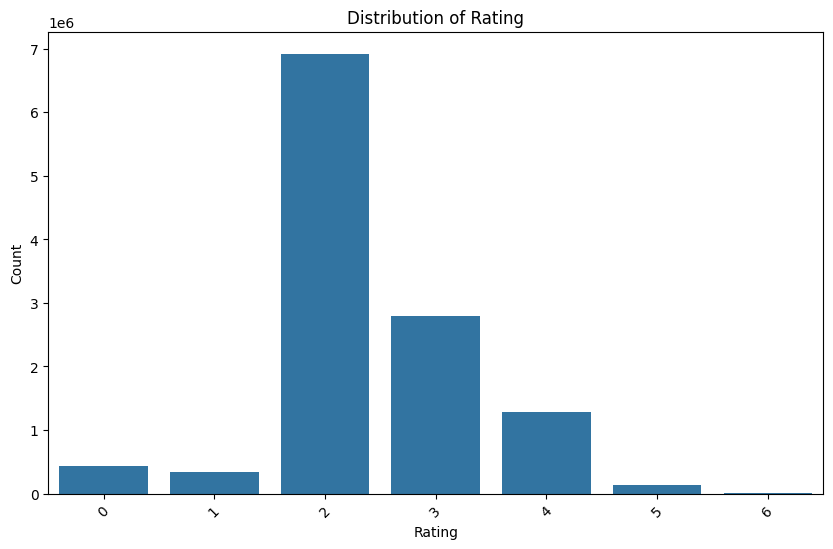

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='Rating')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()

The count plot displayed above represents the distribution of Rating in the data set. It shows that the count of Rating value 2 is much higher than other ratings, which makes Rating value 2 as the most frequently used rating value, the second one is Rating value 3. The remaining ratings of 0, 1, 5, and 6 are less frequent; therefore, it is clear that the majority of the users are likely to rate in a certain range with preference to some middle ratings like 2 and 3. Such a shift in ratings might explain why the actual distribution of ratings might trend towards the average rating within the same dataset.

#####  Line Plot - Average Mean Score by Age

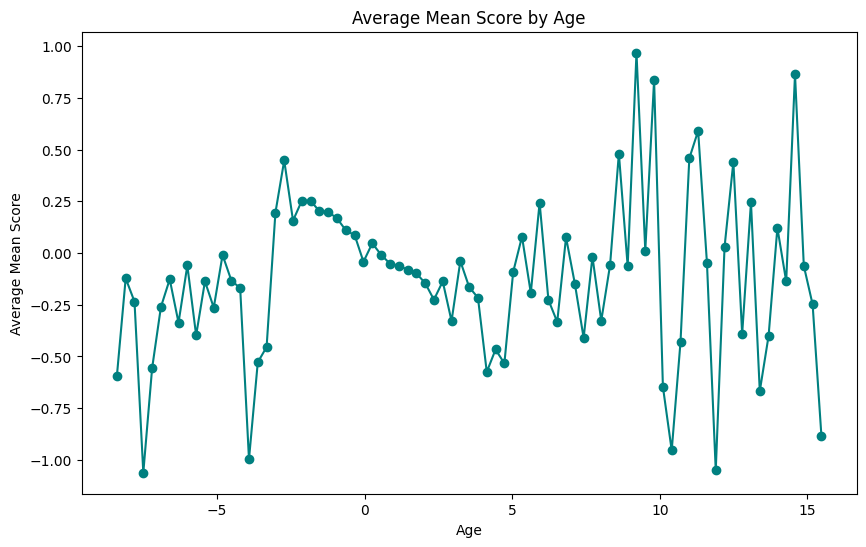

In [48]:
avg_score_by_age = merged_df.groupby('Age')['Mean Score'].mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_score_by_age.index, avg_score_by_age.values, marker='o', color='teal')
plt.title('Average Mean Score by Age')
plt.xlabel('Age')
plt.ylabel('Average Mean Score')
plt.show()

The line plot depicts Mean Score of anime in terms of Age groups of students. The variations suggest that anime is most preferred by some ages and disliked by others as the latter gives the average rating of anime. In the graph, higher points mean age groups that are likely to provide higher score while low point indicate lower scoring age groups. Nonetheless, negative or nonmeaningful values of age indicate data quality concerns, which might require resolution to promote better understanding.

##### Histogram - Distribution of Days Watched

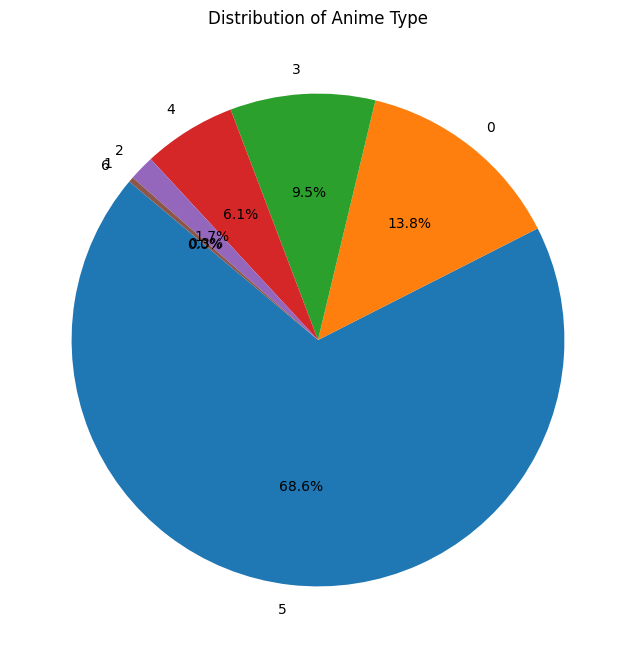

In [49]:
type_counts = merged_df['Type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Anime Type')
plt.show()

Displays the proportion of different anime types (like TV, Movie, OVA). Plotted to findout which is the most used type in the dataset

##### Wide and Deep Model

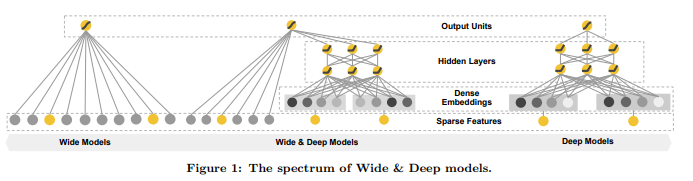

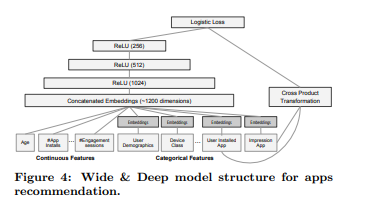

##### Model Definition - AnimeWideAndDeepModel

In [50]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class AnimeWideAndDeepModel(nn.Module):
    def __init__(self, num_users, num_anime_titles, num_genre_types, user_embedding_dim, anime_embedding_dim, genre_embedding_dim, num_continuous_features):
        super(AnimeWideAndDeepModel, self).__init__()
        # Linear layer for the wide part of the model
        self.wide_layer = nn.Linear(num_continuous_features, 1)
        # Embedding layers for users, anime titles, and genres
        self.user_embedding = nn.Embedding(num_users, user_embedding_dim)
        self.anime_embedding = nn.Embedding(num_anime_titles, anime_embedding_dim)
        self.genre_embedding = nn.Embedding(num_genre_types, genre_embedding_dim)
        # Calculate the input dimension for the deep part of the model
        deep_input_dim = user_embedding_dim + anime_embedding_dim + genre_embedding_dim + num_continuous_features
        # Fully connected layers for the deep part of the model
        self.deep_fc1 = nn.Linear(deep_input_dim, 128)
        self.deep_fc2 = nn.Linear(128, 64)
        self.deep_fc3 = nn.Linear(64, 32)
        # Output layer combining wide and deep parts
        self.output_layer = nn.Linear(1 + 32, 1)
    def forward(self, user_id, anime_id, genre_id, continuous_features):
        # Wide part: Apply linear layer to continuous features
        wide_output = self.wide_layer(continuous_features)
        # Deep part: Embed user, anime, and genre IDs
        user_embed = self.user_embedding(user_id).squeeze(1)
        anime_embed = self.anime_embedding(anime_id).squeeze(1)
        genre_embed = self.genre_embedding(genre_id).squeeze(1)
        # Concatenate embeddings and continuous features for the deep input
        deep_input = torch.cat([user_embed, anime_embed, genre_embed, continuous_features], dim=1)
        # Pass through fully connected layers with ReLU activations
        deep_output = F.relu(self.deep_fc1(deep_input))
        deep_output = F.relu(self.deep_fc2(deep_output))
        deep_output = F.relu(self.deep_fc3(deep_output))
         # Combine wide and deep outputs
        combined_output = torch.cat([wide_output, deep_output], dim=1)
        # Final output layer
        final_output = self.output_layer(combined_output)
        return final_output

Defined AnimeWideAndDeepModel, for predicting ratings using word embeddings of user, anime, and genre, as well as continuous covariates. It consists of a linear layer that deals with continuous feature and works in parallel with a feature embedding neural network that works with categorical features such as user IDs, anime titles, and genres. It then converts the category variables into vectors of the required dimensions, joins the numerical features and Feed-Forward neural network (deep learning component) to find non-linear association. The model then averages the wide and deep outputs and then passes it through a single linear layer to give a single prediction. 

##### Dataset Class: AnimeRatingsDataset

In [53]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [54]:
from torch.utils.data import Dataset
import torch
class AnimeRatingsDataset(Dataset):
    def __init__(self, data_frame, scaler=None):
         # Initialize with a DataFrame and an optional scaler for normalization
        self.data_frame = data_frame
        self.scaler = scaler
        # If a scaler is provided, normalize specified columns
        if scaler:
            self.data_frame.loc[:, ['Days Watched', 'Mean Score', 'Watching', 'Completed', 'On Hold', 'Dropped', 'Plan to Watch', 'Episodes Watched', 'Age']] = scaler.transform(
                self.data_frame[['Days Watched', 'Mean Score', 'Watching', 'Completed', 'On Hold', 'Dropped', 'Plan to Watch', 'Episodes Watched', 'Age']])
    def __len__(self):
        # Return the length of the dataset
        return len(self.data_frame)
    def __getitem__(self, idx):
        # Retrieve a row at the given index
        row = self.data_frame.iloc[idx]
        # Extract user ID, anime ID, and genre ID as tensors of long integer type
        user_id = torch.tensor(row['user_id'], dtype=torch.long)
        anime_id = torch.tensor(row['anime_id'], dtype=torch.long)
        genre_id = torch.tensor(row['Genres'], dtype=torch.long)
        # Extract continuous features as a tensor of float type
        continuous_features = torch.tensor([
            row['Days Watched'], row['Mean Score'], row['Watching'], row['Completed'],
            row['On Hold'], row['Dropped'], row['Plan to Watch'], row['Episodes Watched'], row['Age']
        ], dtype=torch.float)
         # Extract the rating as a tensor of float type
        rating = torch.tensor(row['rating'], dtype=torch.float)
        # Return all extracted values for use in model training or evaluation
        return user_id, anime_id, genre_id, continuous_features, rating

class : AnimeRatingsDataset. The function uses pandas DataFrame with the following information: user, anime, genre, continuous features and rating. If a scaler is provided, the continuous features are scaled before they will be used in training so that features with large scales can be easily handled by the model. The len method provides the size of the dataset and the getitem method allows to get the records by their index: the user_id, anime_id and Genres are casted into the tensor suitable for embedding, the continuous features and the target rating are gathered into the tensors of the proper type. This structure also allows PyTorch’s DataLoader to work with it by batch and shuffle the data while training the model and calculating its performance.

#### Data Splitting and Scaling

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, Subset
def split_and_scale_data(anime_data_frame):
    # Randomly sample 50% of the data, stratifying by the 'rating' column to maintain distribution
    sampled_df, _ = train_test_split(merged_df, train_size=0.5, stratify=merged_df['rating'], random_state=42)
    # Initialize a scaler and fit it to the continuous features in the sampled data
    scaler = StandardScaler()
    scaler.fit(sampled_df[['Days Watched', 'Mean Score', 'Watching', 'Completed', 'On Hold', 'Dropped', 'Plan to Watch', 'Episodes Watched', 'Age']])
    # Split the sampled data into training and testing indices with an 80-20 split
    train_indices, test_indices = train_test_split(np.arange(len(sampled_df)), test_size=0.2, random_state=42)
    # Create dataset subsets for training and testing, passing the scaler for feature normalization
    train_data = Subset(AnimeRatingsDataset(sampled_df, scaler=scaler), train_indices)
    test_data = Subset(AnimeRatingsDataset(sampled_df, scaler=scaler), test_indices)
    # Create DataLoader objects for each subset, with a batch size of 64 and shuffling for the training set
    train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=64, shuffle=False)
    # Return the DataLoader objects for use in model training and evaluation
    return train_loader, test_loader

Defined split and scale data function to split anime data. It first selects 50 % of the data from datset in a way that the sample distribution of the rating values is proportional to that of the population (stratified sample). It then scales continuous features using StandardScaler so as to transform them, which boosts model performance. The last step involves partitioning of the sampled data into training indices and the testing indices in the ratio 8:2 respectively. The AnimeRatingsDataset class is used to create train and test subsets, after which the scaler is used to make continuous features more standard. Last, DataLoaders are built for both partitions with the defined batch sizes to load data and shuffle it in the training set during the model training and testing processes.

In [56]:
from sklearn.metrics import mean_squared_error
import numpy as np

def calculate_rmse(true_ratings, predicted_ratings):
    return np.sqrt(mean_squared_error(true_ratings, predicted_ratings))

##### Training Function

In [57]:
import torch.optim as optim
from tqdm import tqdm
def train_anime_model(anime_model, anime_train_loader, num_epochs, loss_criterion, model_optimizer, device):
    """
    Trains the anime recommendation model over a specified number of epochs.

    Parameters:
    anime_model (nn.Module): The model to be trained.
    anime_train_loader (DataLoader): DataLoader containing training data.
    num_epochs (int): Number of epochs to train the model.
    loss_criterion (nn.Module): Loss function used to calculate the training error.
    model_optimizer (torch.optim): Optimizer for updating the model's parameters.
    device (torch.device): Device on which to run the computations (e.g., 'cpu' or 'cuda').

    Returns:
    None
    """
    for epoch in range(num_epochs): # Iterate through each epoch for model training
        # Set the model to training mode
        anime_model.train()
        # Initialize total loss for the epoch
        total_loss = 0.0
        # Progress bar for tracking epoch progress
        progress_bar = tqdm(anime_train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False)
        # Iterate through batches of data in the DataLoader
        for user_id, anime_id, genre_id, continuous_features, rating_target in progress_bar:
            # Transfer data to the specified device (e.g., GPU)
            user_id, anime_id, genre_id, continuous_features, rating_target = user_id.to(device), anime_id.to(device), genre_id.to(device), continuous_features.to(device), rating_target.to(device)
            # Forward pass: Predict ratings using the model
            predicted_rating = anime_model(user_id, anime_id, genre_id, continuous_features)
            # Calculate the loss between predicted and actual ratings
            loss = loss_criterion(predicted_rating.squeeze(), rating_target)
            # Zero the gradients to prevent accumulation from previous iterations
            model_optimizer.zero_grad()
            # Backward pass: Compute gradients for model parameters
            loss.backward()
            # Step the optimizer to update model parameters
            model_optimizer.step()
            # Accumulate loss for reporting
            total_loss += loss.item()
        # Calculate average loss for the epoch
        average_loss = total_loss / len(anime_train_loader)
        # Print the average loss for the current epoch
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {average_loss:.4f}")

train_anime_model function defined to train an anime recommendation model through multiple epochs with a training Data Loader. In each epoch the model goes into training mode and for each batch it samples from the anime_train_loader. For each batch, it transfers input tensors including user ID, anime ID, genre ID, continuous features and target ratings to the desired device either CPU or GPU. Predicted values are ratings in this case and then you get the difference between the predicted and actual values by using the defined loss function. The loss is then propagated back, and model_optimizer then updates the model’s weights after the gradients have been set to zero. It keeps and visualizes the average loss per epoch that can be used for training performance in terms of the epochs. 

##### Evaluation Function with RMSE and Accuracy Calculation

In [58]:
import torch
import numpy as np
from tqdm import tqdm
# Evaluates the anime recommendation model on the test dataset and computes the RMSE and accuracy within a threshold.
def evaluate_anime_model(anime_model, anime_test_loader, threshold=0.5, device='cpu'):
    # Set model to evaluation mode
    anime_model.eval()
    # Initialize lists to store true and predicted ratings for RMSE calculation
    all_true_ratings, all_predicted_ratings = [], []
    # Variables to track correct predictions within the specified threshold
    correct_within_threshold, total_predictions = 0, 0
    # Disable gradient calculation for evaluation
    with torch.no_grad():
        # Iterate over the test dataset
        for user_id, anime_id, genre_id, continuous_features, true_rating in tqdm(anime_test_loader, desc="Testing"):
             # Move data to the specified device (e.g., GPU or CPU)
            user_id, anime_id, genre_id, continuous_features, true_rating = user_id.to(device), anime_id.to(device), genre_id.to(device), continuous_features.to(device), true_rating.to(device)       
            # Predict ratings using the model
            predicted_rating = anime_model(user_id, anime_id, genre_id, continuous_features).squeeze()    
            # Collect predictions and true ratings for later RMSE calculation       
            all_predicted_ratings.extend(predicted_rating.cpu().tolist())
            all_true_ratings.extend(true_rating.cpu().tolist()) 
            # Count predictions within the threshold of the true rating for accuracy calculation
            correct_within_threshold += torch.sum(torch.abs(predicted_rating - true_rating) <= threshold).item()
            total_predictions += true_rating.size(0)
    # Calculate Root Mean Square Error (RMSE) between true and predicted ratings
    rmse_score = calculate_rmse(np.array(all_true_ratings), np.array(all_predicted_ratings))
    # Calculate accuracy as the percentage of predictions within the threshold range
    accuracy = (correct_within_threshold / total_predictions) * 100 
    # Print evaluation metrics
    print(f"Test RMSE: {rmse_score:.4f}")
    print(f"Test Accuracy (within ±{threshold} of true rating): {accuracy:.2f}%")

The function evaluate_anime_model evaluates on a test set and the closeness of the prediction to the actual value using accuracy parameter. The model switches to evaluation mode to turn off the gradients and batches are fetched from test_loader. For each batch, the input (user ID, anime ID, genre ID and continuous features) and the true rating are transferred to the given device. The predicted ratings by the model are compared to the actual ones and the function identifies the number of predictions within the certain range (± 0.5 by default). It computes the root mean squared error (RMSE) with the help of the calculate_rmse helper function; it saves the predicted and true ratings for overall evaluation as well as for RMSE. The results show the accuracy of the model assessment within the threshold for the ratings and the general accuracy of the model for the test dataset.

##### Main Function to Run Training and Evaluation

In [60]:
def main_training_evaluation(anime_data_frame):
    # Define the dimensions of the embeddings for users, anime, and genres
    embedding_dims = {'user_embedding_dim': 16, 'anime_embedding_dim': 16, 'genre_embedding_dim': 8}
    # Calculate the maximum user, anime, and genre IDs to set embedding sizes
    max_user_id = anime_data_frame['user_id'].max() + 1
    max_anime_id = anime_data_frame['anime_id'].max() + 1
    max_genre_id = anime_data_frame['Genres'].max() + 1
    # Define the number of continuous features used in the model (e.g., ratings, scores)
    num_continuous_features = 9
    # Set the device to GPU if available, otherwise use CPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    # Initialize the Wide and Deep Model for anime recommendations
    anime_model = AnimeWideAndDeepModel(max_user_id, max_anime_id, max_genre_id, **embedding_dims, num_continuous_features=num_continuous_features).to(device)
    # Define the Mean Squared Error (MSE) loss function for training
    loss_criterion = nn.MSELoss()
    # Initialize the Adam optimizer with a learning rate of 0.0005
    model_optimizer = optim.Adam(anime_model.parameters(), lr=0.0005)
    # Split the anime data frame into training and testing sets and scale them for the model
    anime_train_loader, anime_test_loader = split_and_scale_data(anime_data_frame)
    # Train the model on the training set for 20 epochs
    train_anime_model(anime_model, 
                      anime_train_loader, 
                      num_epochs=20, 
                      loss_criterion=loss_criterion, 
                      model_optimizer=model_optimizer, 
                      device=device)
    # Evaluate the trained model on the test set with a prediction threshold of 0.5
    evaluate_anime_model(anime_model, 
                         anime_test_loader, 
                         threshold=0.5, 
                         device=device)
    # Execute the training and evaluation process with the provided anime dataset
main_training_evaluation(merged_df)

Epoch [1/20], Loss: 1.7980


Epoch [2/20], Loss: 1.6655


Epoch [3/20], Loss: 1.6476


Epoch [4/20], Loss: 1.6284


Epoch [5/20], Loss: 1.6074


Epoch [6/20], Loss: 1.5870


Epoch [7/20], Loss: 1.5683


Epoch [8/20], Loss: 1.5509


Epoch [9/20], Loss: 1.5343


Epoch [10/20], Loss: 1.5190


Epoch [11/20], Loss: 1.5044


Epoch [12/20], Loss: 1.4900


Epoch [13/20], Loss: 1.4758


Epoch [14/20], Loss: 1.4615


Epoch [15/20], Loss: 1.4477


Epoch [16/20], Loss: 1.4339


Epoch [17/20], Loss: 1.4198


Epoch [18/20], Loss: 1.4060


Epoch [19/20], Loss: 1.3925


Epoch [20/20], Loss: 1.3792


Testing: 100%|██████████| 18597/18597 [05:37<00:00, 55.08it/s] 


Test RMSE: 1.3105
Test Accuracy (within ±0.5 of true rating): 33.70%


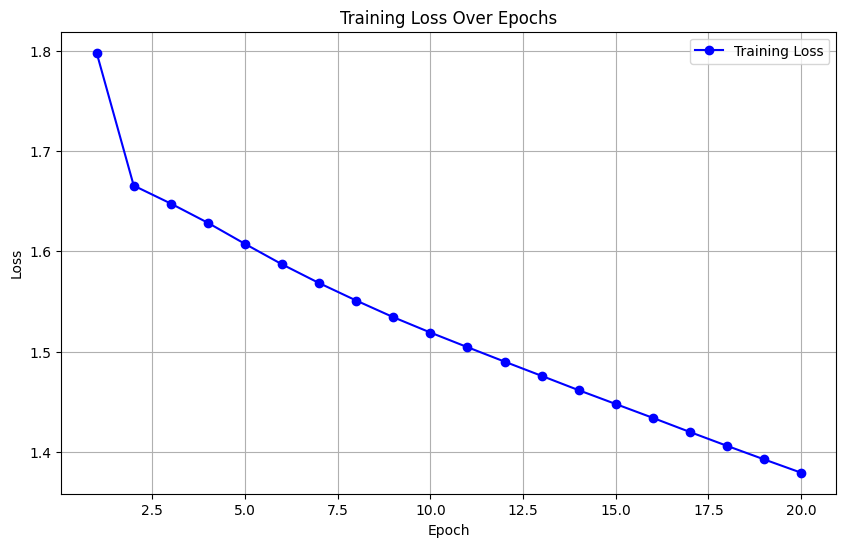

In [62]:
import matplotlib.pyplot as plt
epochs = list(range(1, 21))
losses = [1.7980, 1.6655, 1.6476, 1.6284, 1.6074, 1.5870, 1.5683, 1.5509, 
          1.5343, 1.5190, 1.5044, 1.4900, 1.4758, 1.4615, 1.4477, 1.4339, 
          1.4198, 1.4060, 1.3925, 1.3792]
plt.figure(figsize=(10, 6))
plt.plot(epochs, losses, marker='o', linestyle='-', color='b', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()
plt.show()


As observed the loss begins from about 1.8 and descends gradually as the epochs increase, which shows the model is learning and reducing the loss from the data. This shown trend simply means that the model is learning progressively lower error rates as it fine tunes the weightage parameters in every epoch.
The performance of the model for unseen data is indicated using the Test RMSE (Root Mean Square Error) of 1.3105. It is essential to know that the lower RMSE value represent the better model performance. Here, the model became reasonably accurate for the given task with the RMSE equaled to 1.3105, but it still can be improved.

It is evident through the steady decrease seen in the training loss that the area under the loss curve started improving and the convergence to training occurred with effective learning.

Training Loss: The initial loss value of the gradient at the start is 1.7980 which then reduces to 1.3792 at the end of 20 epochs. This epitomizes a fairly consistent decrease over time where the model is gradually diminishing loss. There is little overfitting or underfitting evident from the epochs evaluated hence the model is functional as per its requirements.

Test RMSE: Testing the set, the model fitted to the data had an RMSE of 1.3105 on the test set. Since RMSE is the average of the prediction errors, it is descriptive in nature and as such, lower levels of RMSE suggest improved accuracy for models. From scores of around 1.3105, levels of errors around 1.3105 are reasonable depending on the rating scales in use.

Test Accuracy (within ±0.5 of true rating): From the true rating, the model was able to correctly rate within 33.70 percent of the true rating and with a margin of 0.5. This measure is especially useful for recommendation systems as it shows how near the model comes to the actual ratings. For accuracy levels this margin is approximately 33.70 for quite a substantial ratio of around 1/3 targets within the margin which is reasonable and good enough for first time readings.

Observations and Potential Adjustments: 

With embedding dimensions of 16 for users and anime, and 8 for genres, these settings appear effective. It is possible to raise the user and anime embedding dimensions higher if one seeks even greater accuracy. 

The Adam optimizer that has a rate of 0.0005 allows for the model to converge in a stable manner. Other variables such as learning rate or optimizers, for example SGD with momentum, are varied from time to time. 

Training for 20 epochs shows effective convergence, with loss still decreasing. 

Performance may further improve with additional training, especially when overfitting is not a concern. 

Fine-tuning embedding dimensions across different features may enhance the model's representation capacity. 

Rearranging the wide and deep portions of the branch structure may optimize performance. 

Using dropout may mitigate this overfitting, should it occur. 

Extending the accuracy threshold margin might enable one to better evaluate how closely the model predictions actually correspond to the given ratings.

